## Dataset Analytics Jobs
Objective: Use the Rendered.ai SDK to access and run Analytics jobs.

#### Install anatools from PyPi

In [ ]:
pip install anatools --upgrade

#### Log in

Enter your credentials at the prompts. Logging in successfully will list the organizations and workspaces you have access to.

In [ ]:
import anatools

sdk = anatools.client()

#### Set up imports
These imports are required for this Notebook to run.

In [ ]:
import os
import glob
import yaml, json
import wget
import time
from zipfile import ZipFile
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

pp = pprint.PrettyPrinter(indent=4)

## Calculate Dataset Analytics
The Analytics job is used to generate different types of metrics for a dataset. They types of analytics can be retrieved with the `get_analytics_types` SDK function. The basic types of analytics are:

- properties - high level metrics of the job, such as the distribution of image sizes and formats
- objectMetrics - metrics of object classes, such as distributions and bounding box sizes

In [ ]:
sdk.get_analytics_types()

Analytics jobs are kicked off with the command `create_analytics`, which returns an analytics job id.  The analytics job id can be used with `get_analytics` to poll for the job status and collect the results.

In [ ]:
# Create an analytics job : CHOOSE TYPE
#analyticsId = sdk.create_analytics(datasetId, type='properties')
analyticsId = sdk.create_analytics(datasetId, type='objectMetrics')

# Confirm job completion
print("\nThis should just take a couple minutes...")
analytics = sdk.get_analytics(datasetId, analyticsId=analyticsId)
while analytics[0]['status'] not in ['complete', 'failed']:
  time.sleep(10)
  analytics = sdk.get_analytics(datasetId, analyticsId=analyticsId)
  print(analytics[0]['status'])
  
properties = json.loads(analytics[0]['result'])
for key, value in properties.items():
    print(key, ' : ', value)

Display metrics are in image format.

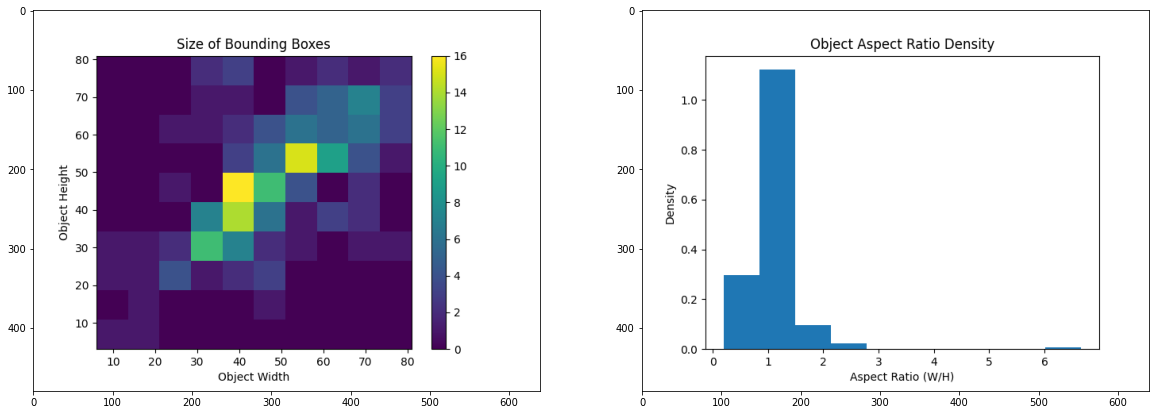

In [21]:
bbox_sizes_image = Image.open("bbox_sizes.png", 'r')
aspect_ratios_image = Image.open("aspect_ratios.png", 'r')

f = plt.figure(figsize=(20, 10))
f.add_subplot(1, 2, 1)
plt.imshow(bbox_sizes_image)

f.add_subplot(1, 2, 2)
plt.imshow(aspect_ratios_image)

plt.show()